/tmp/ipykernel_913632/1547477051.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensor = torch.load("/home/binguo/data/MLA-FT/utils/qk_tensor_7B.pth")


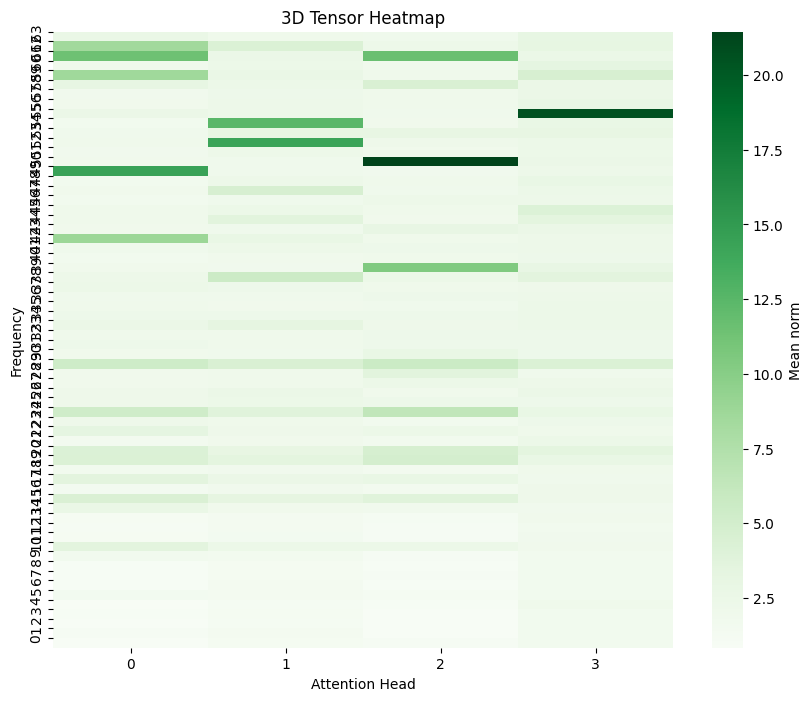

In [5]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你的三维张量如下，实际中你需要替换为你的数据
tensor = torch.load("/home/binguo/data/MLA-FT/utils/qk_tensor_7B.pth")

# 展平张量
tensor_flatten = tensor.reshape(tensor.shape[0] * tensor.shape[1], -1)

tensor_flatten = torch.stack([tensor_flatten[idx] for idx in [100, 264,524, 750]])

tensor_flatten = tensor_flatten.T
# 翻转数据以实现 y 轴从上到下递减
tensor_flipped = tensor_flatten.flip(0)  # 使用 torch 的 flip 方法对第 0 维翻转

# 创建一个热力图
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    tensor_flipped, 
    cmap='Greens', 
    cbar_kws={'label': 'Mean norm'}, 
    # xticklabels=False,  # 关闭默认横轴标签
    # yticklabels=False   # 关闭默认纵轴标签
)

# 设置标题和标签
plt.title('3D Tensor Heatmap')
plt.xlabel('Attention Head')
plt.ylabel('Frequency')

# 自定义纵轴刻度标签，使其从上到下递减
yticks = range(tensor_flipped.shape[0])  # 纵轴刻度范围
ax.set_yticks(yticks)  # 设置纵轴刻度位置
ax.set_yticklabels([str(y) for y in reversed(yticks)])  # 倒序显示纵轴标签

# 显示图形
plt.show()

/tmp/ipykernel_910620/1971787338.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensor = torch.load("/home/binguo/data/MLA-FT/utils/qk_tensor_7B.pth")
findfont: Font f

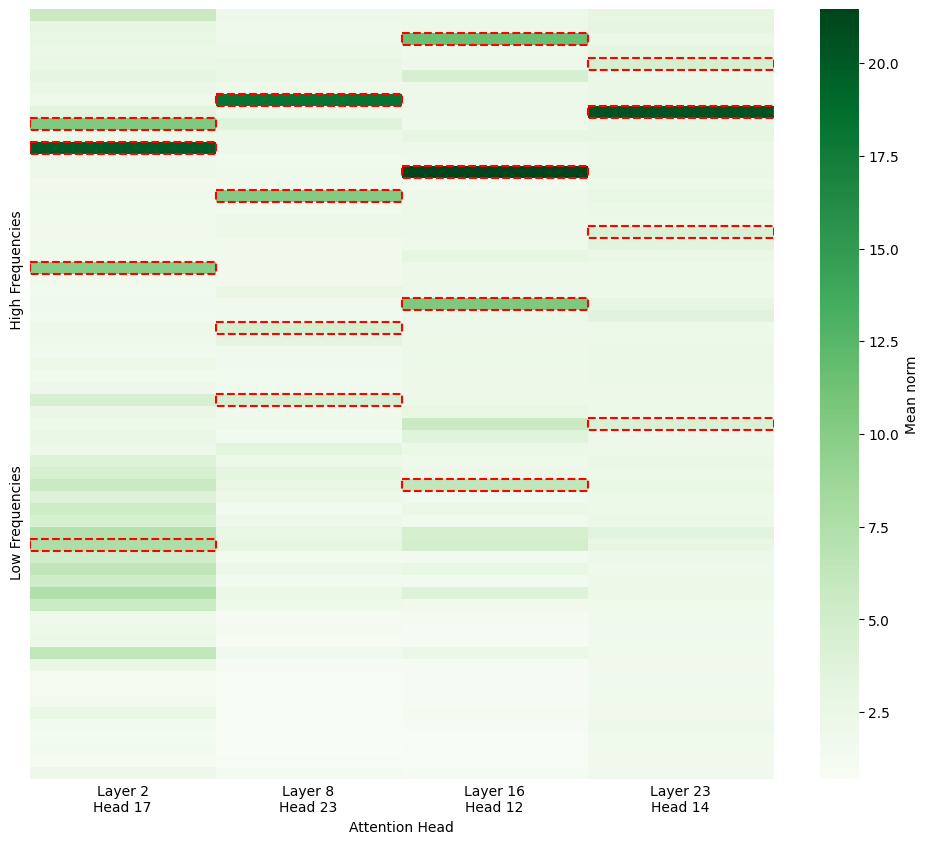

In [8]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import font_manager

times_new_roman = font_manager.FontProperties(family='Times New Roman')
rcParams['font.family'] = times_new_roman.get_name()
plt.rc('font', family='Times New Roman')

# 假设你的三维张量如下，实际中你需要替换为你的数据
tensor = torch.load("/home/binguo/data/MLA-FT/utils/qk_tensor_7B.pth")

# 索引列表
indexs = [
    (2, 17),
    (8, 23),
    (16, 12),
    (23, 14)
]

# 提取并处理张量
tensor_flatten = torch.stack([tensor[idx] for idx in indexs])
tensor_flatten = tensor_flatten.T
tensor_flipped = tensor_flatten.flip(0)  # 翻转数据以实现 y 轴从上到下递减

# 转换为 NumPy 数组以便于操作
tensor_flipped_np = tensor_flipped.numpy()

# 找到每列绝对值最大的 4 个值的索引
highlight_indices = []
for col in range(tensor_flipped_np.shape[1]):
    column = tensor_flipped_np[:, col]
    top_indices = np.argsort(np.abs(column))[-4:]  # 找到绝对值最大的 4 个索引
    highlight_indices.append((col, top_indices))


# 创建热力图
plt.figure(figsize=(12, 10))
ax = sns.heatmap(
    tensor_flipped, 
    cmap='Greens', 
    cbar_kws={'label': 'Mean norm'}, 
    xticklabels=False, 
    yticklabels=False, 
    annot=False,  # 关闭单元格标注
    fmt=".1f"
)

# 设置 x 轴底部序号
x_labels = [f"Layer {idx[0]}\nHead {idx[1]}" for idx in indexs]
ax.set_xticks([i + 0.5 for i in range(len(x_labels))])  # 设置 x 轴刻度位置
ax.set_xticklabels(x_labels)  # 添加自定义的刻度标签

# 移除刻度线
ax.tick_params(axis='x', length=0)  # 设置 x 轴刻度线长度为 0
ax.tick_params(axis='y', length=0)  # 如果 y 轴也需要移除刻度线，可设置为 0

# 设置轴标签
plt.xlabel('Attention Head', fontproperties=times_new_roman)
plt.ylabel("Low Frequencies                               High Frequencies", fontproperties=times_new_roman)

# 设置颜色条字体
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_font_properties(times_new_roman)

# 在热力图上绘制红框
for col, indices in highlight_indices:
    for row in indices:
        rect = patches.Rectangle(
            (col, row), 1, 1,  # 矩形框的左下角坐标和宽高
            linewidth=1.5, edgecolor='red', facecolor='none',linestyle='dashed' 
        )
        ax.add_patch(rect)


# 显示图形
plt.show()
